In [1]:
#import liblaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

## データの読み込み

In [41]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## テキストを数値に変換

In [80]:
all_data =  pd.concat((train.drop('SalePrice', axis=1), test), axis=0)
print(all_data.shape)
all_data = pd.get_dummies(all_data)    # カテゴリカルデータを数値に変換する
all_data = all_data.fillna(all_data.mean())    # NaNは行の平均値で代替
print(all_data.shape)
all_data.head()

(2919, 80)
(2919, 289)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


## 線形回帰で学習＆予測

In [61]:
train_target = train['SalePrice']
train_data = all_data[:train.shape[0]]
test_data = all_data[train.shape[0]:]

In [89]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
lr_predicted = lr.predict(test_data)
lr_predicted = pd.DataFrame({"Id":test_data.Id, "SalePrice":lr_predicted})
lr_predicted.head()

,Id,SalePrice
0,1461,113372.982054
1,1462,161701.763337
2,1463,187633.715977
3,1464,197974.704089
4,1465,206205.065504


In [95]:
lr_predicted.to_csv("LR_solution.csv", index=False)   # write to csv

## おまけ

### RandomForestRegressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rfr.fit(train_data, train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [93]:
rfr_predicted = rfr.predict(test_data)
rfr_predicted = pd.DataFrame({"Id":test_data.Id, "SalePrice":rfr_predicted})
rfr_predicted.head()

,Id,SalePrice
0,1461,129630.032
1,1462,152614.230
2,1463,180769.936
3,1464,182340.808
4,1465,200601.974


In [94]:
rfr_predicted.to_csv("RFR_solution.csv", index=False)   # write to csv

### 教師データの分布

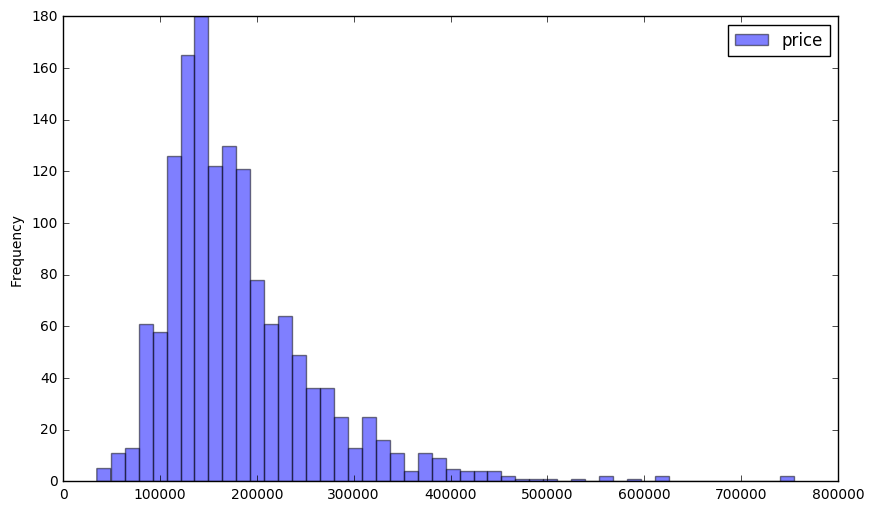

In [83]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

prices = pd.DataFrame({"price":train["SalePrice"]})
ax= prices.plot(bins=50, alpha=0.5, figsize=(10,6), kind='hist')

### 予測したデータの分布

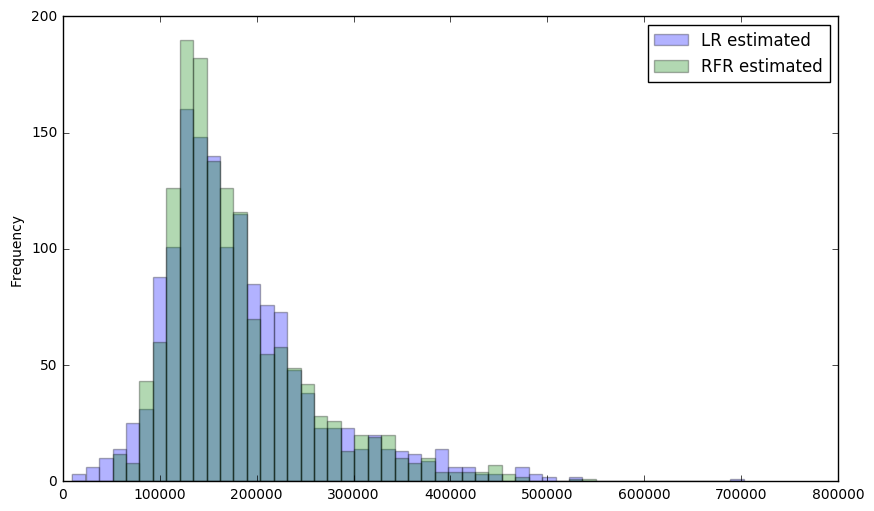

In [100]:
result = pd.DataFrame({"LR estimated":lr_predicted["SalePrice"], "RFR estimated":rfr_predicted["SalePrice"]})
ax= result.plot(bins=50, alpha=0.3, figsize=(10,6), kind='hist')

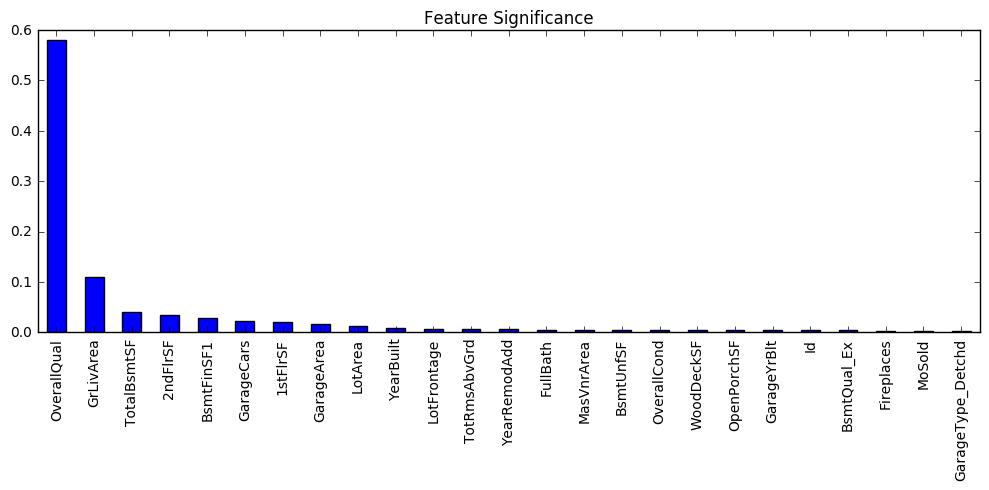

In [107]:
# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(rfr.feature_importances_, index = train_data.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

### 変数2個

In [113]:
lr_removed = linear_model.LinearRegression()
lr_removed.fit(train_data[['OverallQual', 'GrLivArea']], train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
lr_removed_predicted = lr_removed.predict(test_data[['OverallQual', 'GrLivArea']])
lr_removed_predicted = pd.DataFrame({"Id":test_data.Id, "SalePrice":lr_removed_predicted})
lr_removed_predicted.head()

,Id,SalePrice
0,1461,110205.121979
1,1462,167242.513238
2,1463,151152.133569
3,1464,182604.625362
4,1465,230203.359049


In [123]:
lr_removed_predicted.to_csv("LR_R_solution.csv", index=False)   # write to csv

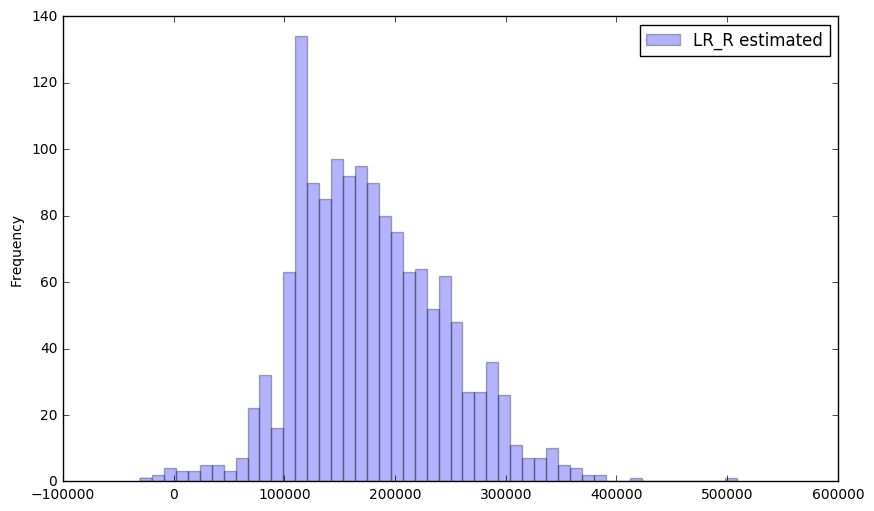

In [122]:
result = pd.DataFrame({"LR_R estimated":lr_removed_predicted["SalePrice"]})
ax= result.plot(bins=50, alpha=0.3, figsize=(10,6), kind='hist')